In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
#4 Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`

gdp_df = pd.read_csv(r'C:\Users\Dell\Documents\gdp-and-internet-usage-Eliab16\notebooks\data\gdp_percapita.csv')


In [137]:
gdp_df.shape

(7662, 3)

In [138]:
gdp_df.tail()

,Country or Area,Year,Value
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843
7661,Zimbabwe,1990,2704.757299


In [139]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [140]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB



gdp_df.tail()

In [ ]:
# Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'
# gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

gdp_df.rename(columns={'Country or Area':'Country', 'Year':'Year', 'Value':'GDP_Per_Capita'}, inplace=True)

gdp_df.head(10)

In [157]:
# 7. How many countries have data for all years?
gdp_df['Year'].nunique()

33

In [154]:
# 7b Which countries are missing many years of data?
unique_years = pd.DataFrame(gdp_df.groupby(['Country'])['Year'].count())
print(unique_years)
# unique_years.reset_index(inplace=True)
# print(unique_years[unique_years['Years']==33])
# print(unique_years[unique_years['Years']!=33])

                             Year
Country                          
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
...                           ...
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33

[242 rows x 1 columns]


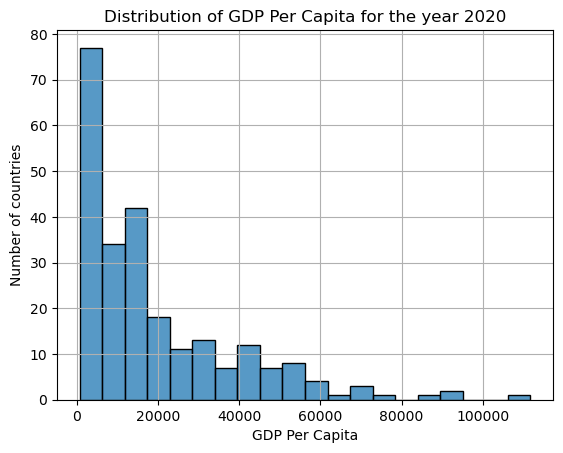

In [155]:
# Create a histogram
gdp_df_filtered = gdp_df[gdp_df['Year'] == 2020]
sns.histplot(gdp_df_filtered['GDP_Per_Capita'], bins=20)
plt.title('Distribution of GDP Per Capita for the year 2020')
plt.xlabel('GDP Per Capita')
plt.ylabel('Number of countries')
plt.grid(True)
plt.show()

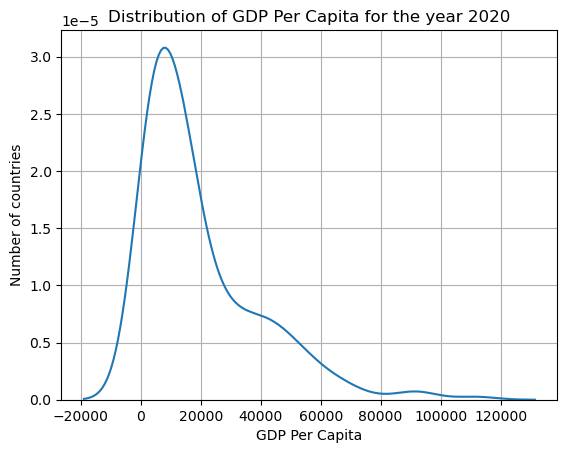

In [156]:
# density plot
sns.kdeplot(gdp_df_filtered['GDP_Per_Capita'])
plt.title('Distribution of GDP Per Capita for the year 2020')
plt.xlabel('GDP Per Capita')
plt.ylabel('Number of countries')
plt.grid(True)
plt.show()


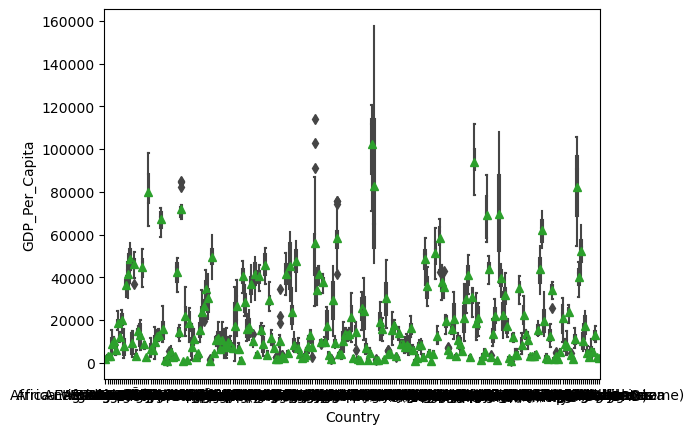

In [170]:
#boxplot
gdp_df_filtered = gdp_df[gdp_df['Year'] == 2020]
sns.boxplot(
    x = '',
    y = "GDP_Per_Capita",
    showmeans=True,
    data=gdp_df
)

plt.show()



<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

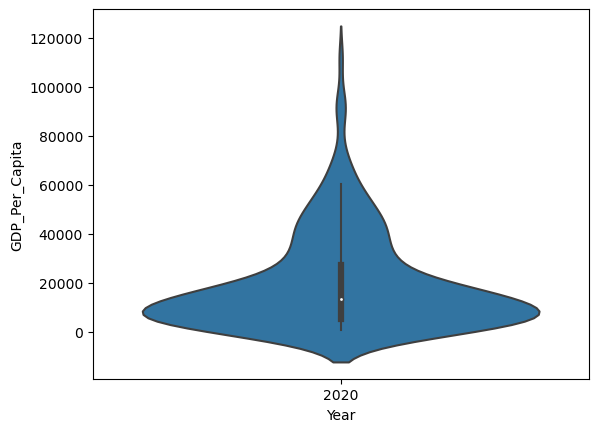

In [260]:
# violinplot
gdp_df_filtered = gdp_df[gdp_df['Year'] == 2020]
sns.violinplot(
    x = gdp_df_filtered['Year'],
    y = gdp_df_filtered['GDP_Per_Capita'])
    


In [258]:
# 9 What was the median GDP per capita value in 2020
gdp_df_filtered = gdp_df[gdp_df['Year'] == 2020]
# GDP_Per_Capita = gdp_df_filtered['GDP_Per_Capita']
median_gdp_per_capita = gdp_df_filtered['GDP_Per_Capita'].agg('median')
print(median_gdp_per_capita)

13357.997573370474


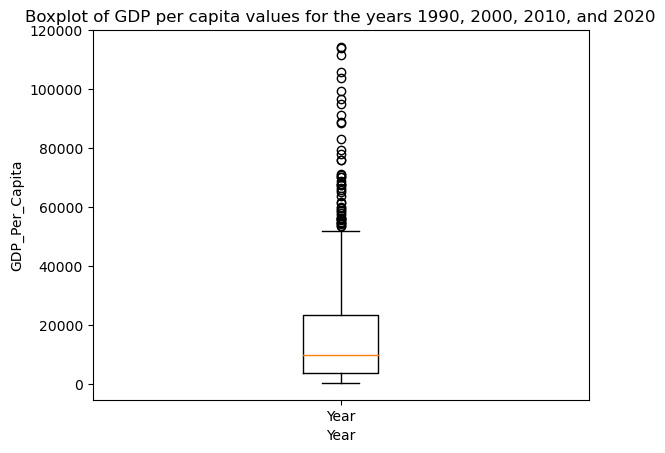

In [188]:
# compare GDP per capita values for the years 1990, 2000, 2010 and 2020
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
plt.boxplot(gdp_decades['GDP_Per_Capita'], labels=['Year'])
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.title('Boxplot of GDP per capita values for the years 1990, 2000, 2010, and 2020')
plt.show()

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

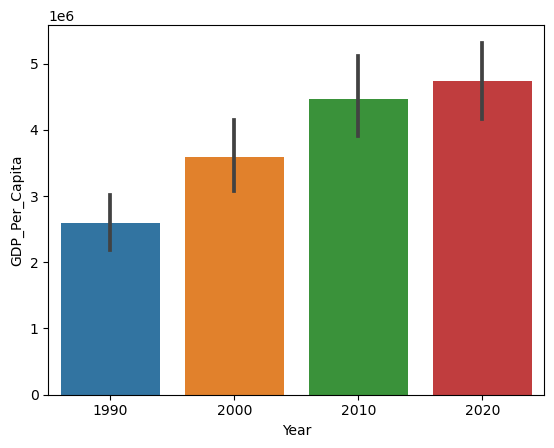

In [192]:
# barplot
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
sns.barplot(
    y="GDP_Per_Capita", 
    x="Year", 
    data = gdp_decades, 
    estimator=sum)
    

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

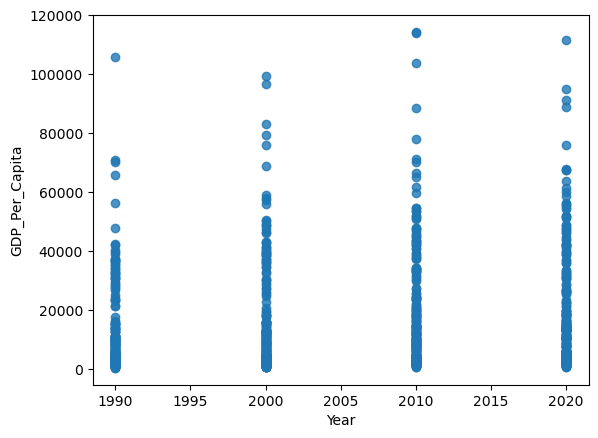

In [255]:
# A scatterplot
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"],fit_reg=False)



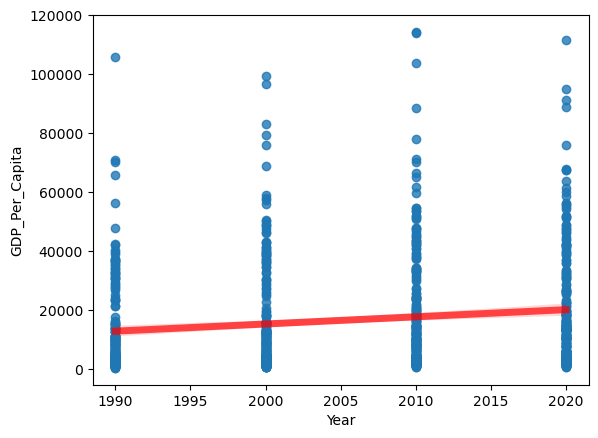

In [195]:
# A scatterplot with a trend line overlaid
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

In [202]:
11# Which country was the first to have a GDP per capita greater than $100,000?
GDP_Per_Capita > 100000
gdp_df_sorted=gdp_df.sort_values('Year')
gdp_df_filtered = gdp_df_sorted[gdp_df_sorted['GDP_Per_Capita'] > 100000]
first_row = gdp_df_filtered.iloc[0]
Country = first_row['Country']
print(Country)


United Arab Emirates


In [222]:
#12  Which country had the highest GDP per capita in 2020
gdp_df_2020 = gdp_df[gdp_df['Year']==2020]
highest_gdp_country = gdp_df_2020.loc[gdp_df_2020['GDP_Per_Capita'].idxmax()]
highest_gdp_country_name = highest_gdp_country['Country']
gdp_per_capita = highest_gdp_country['GDP_Per_Capita']
print(highest_gdp_country_name)
print(gdp_per_capita)


Luxembourg
111751.3147513618


Text(0, 0.5, 'GDP_Per_Capita')

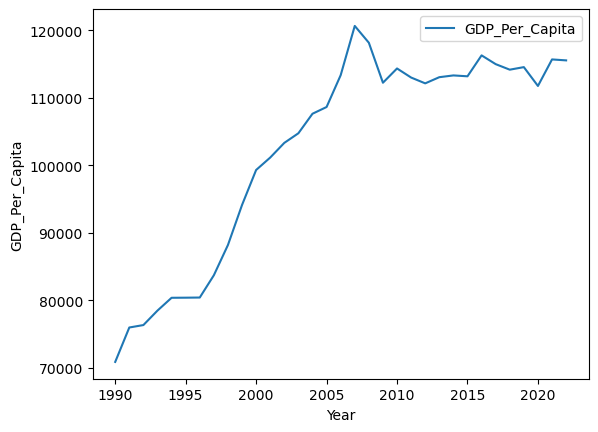

In [275]:
# Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset
gdp_Lux = gdp_df[gdp_df['Country'] == 'Luxembourg']
gdp_Lux.plot.line('Year','GDP_Per_Capita')
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')

In [237]:
#13 Which country had the lowest GDP per capita in 2020
gdp_df_2020 = gdp_df[gdp_df['Year']==2020]
lowest_gdp_country = gdp_df_2020.loc[gdp_df_2020['GDP_Per_Capita'].idxmin()]
lowest_gdp_country_name = lowest_gdp_country['Country']
gdp_per_capita = lowest_gdp_country['GDP_Per_Capita']
print(lowest_gdp_country_name)
print(gdp_per_capita)

Burundi
711.355263423169


Text(0, 0.5, 'GDP_Per_Capita')

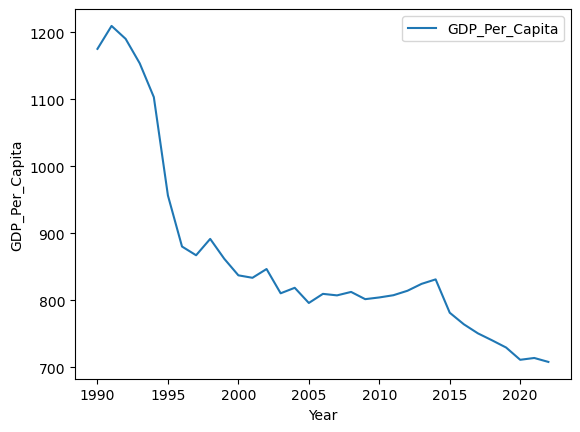

In [276]:
# Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset
gdp_Br = gdp_df[gdp_df['Country'] == 'Burundi']
gdp_Br.plot.line('Year','GDP_Per_Capita')
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')

In [239]:
internet_df = pd.read_csv(r'C:\Users\Dell\Documents\gdp-and-internet-usage-Eliab16\notebooks\data\internet_use.csv')

In [262]:
internet_df.shape

(7662, 3)

In [241]:
# 14take per a look at the top and bottom few rows to make sure that it has been read in correctly
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [243]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [261]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             7662 non-null   object 
 1   Year                7662 non-null   int64  
 2   Internet_Users_Pct  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


In [254]:
# 15Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'
# internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df.rename(columns={'Country or Area':'Country', 'Year':'Year', 'Value':'Internet_Users_Pct'}, inplace=True)
internet_df.head(10)

,Country,Year,Internet_Users_Pct
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
5,Afghanistan,2016,2101.422187
6,Afghanistan,2015,2108.714173
7,Afghanistan,2014,2144.449634
8,Afghanistan,2013,2165.340915
9,Afghanistan,2012,2122.830759


In [264]:
16# Look at the number of observations in this dataset per year. What do you notice?
observetio_per_year = internet_df['Year'].value_counts().sort_index()
print(observetio_per_year)
# number of observations have same values after year 2012

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: count, dtype: int64


In [267]:
# 17 What is the first year to have a non-zero internet users percentage value?
internet_df_non_zero = internet_df[internet_df['Internet_Users_Pct'] > 0]
first_year = internet_df_non_zero['Year'].min()
print(first_year)

1990


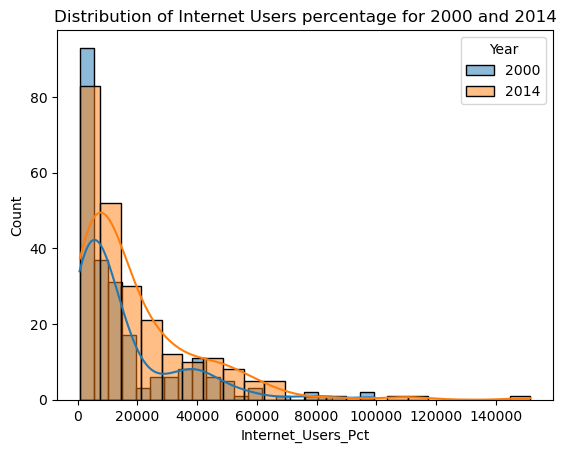

In [269]:
# 18How does the distribution of internet users percent differ for 2000 and 2014?
internet_df_2020 = internet_df[internet_df['Year'] == 2000]
internet_df_2014 = internet_df[internet_df['Year'] == 2014]
sns.histplot(internet_df_2020['Internet_Users_Pct'],kde=True,label='2000')
sns.histplot(internet_df_2014['Internet_Users_Pct'],kde=True,label='2014')
plt.legend(title='Year')
plt.title('Distribution of Internet Users percentage for 2000 and 2014' )
plt.xlabel('Internet_Users_Pct')
plt.show()


In [274]:
# 19For how many countries was the percentage of internet users below 5% in 2014?
below_5_percent_2014 = internet_df[(internet_df['Year']==2014)&(internet_df['Internet_Users_Pct'] < 5)]
num_countries_below_5_percent = below_5_percent_2014['Country'].nunique()
print(num_countries_below_5_percent)

0
